In [506]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import * 
import sklearn.linear_model
import statsmodels.api as sm
import re

%matplotlib notebook

In [507]:
target_hist = pd.read_csv("/Users/regevschweiger/Documents/matshuff_data/ela_19/counts.txt", sep="\t")

In [508]:
dcounts = pd.read_csv("/Users/regevschweiger/Documents/matshuff_data/ela_19/dcounts.txt", sep="\t")

In [509]:
thetas_ratio = np.maximum(np.log(target_hist.p[1:]/dcounts.p[1:]), -10000)

/Users/regevschweiger/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>


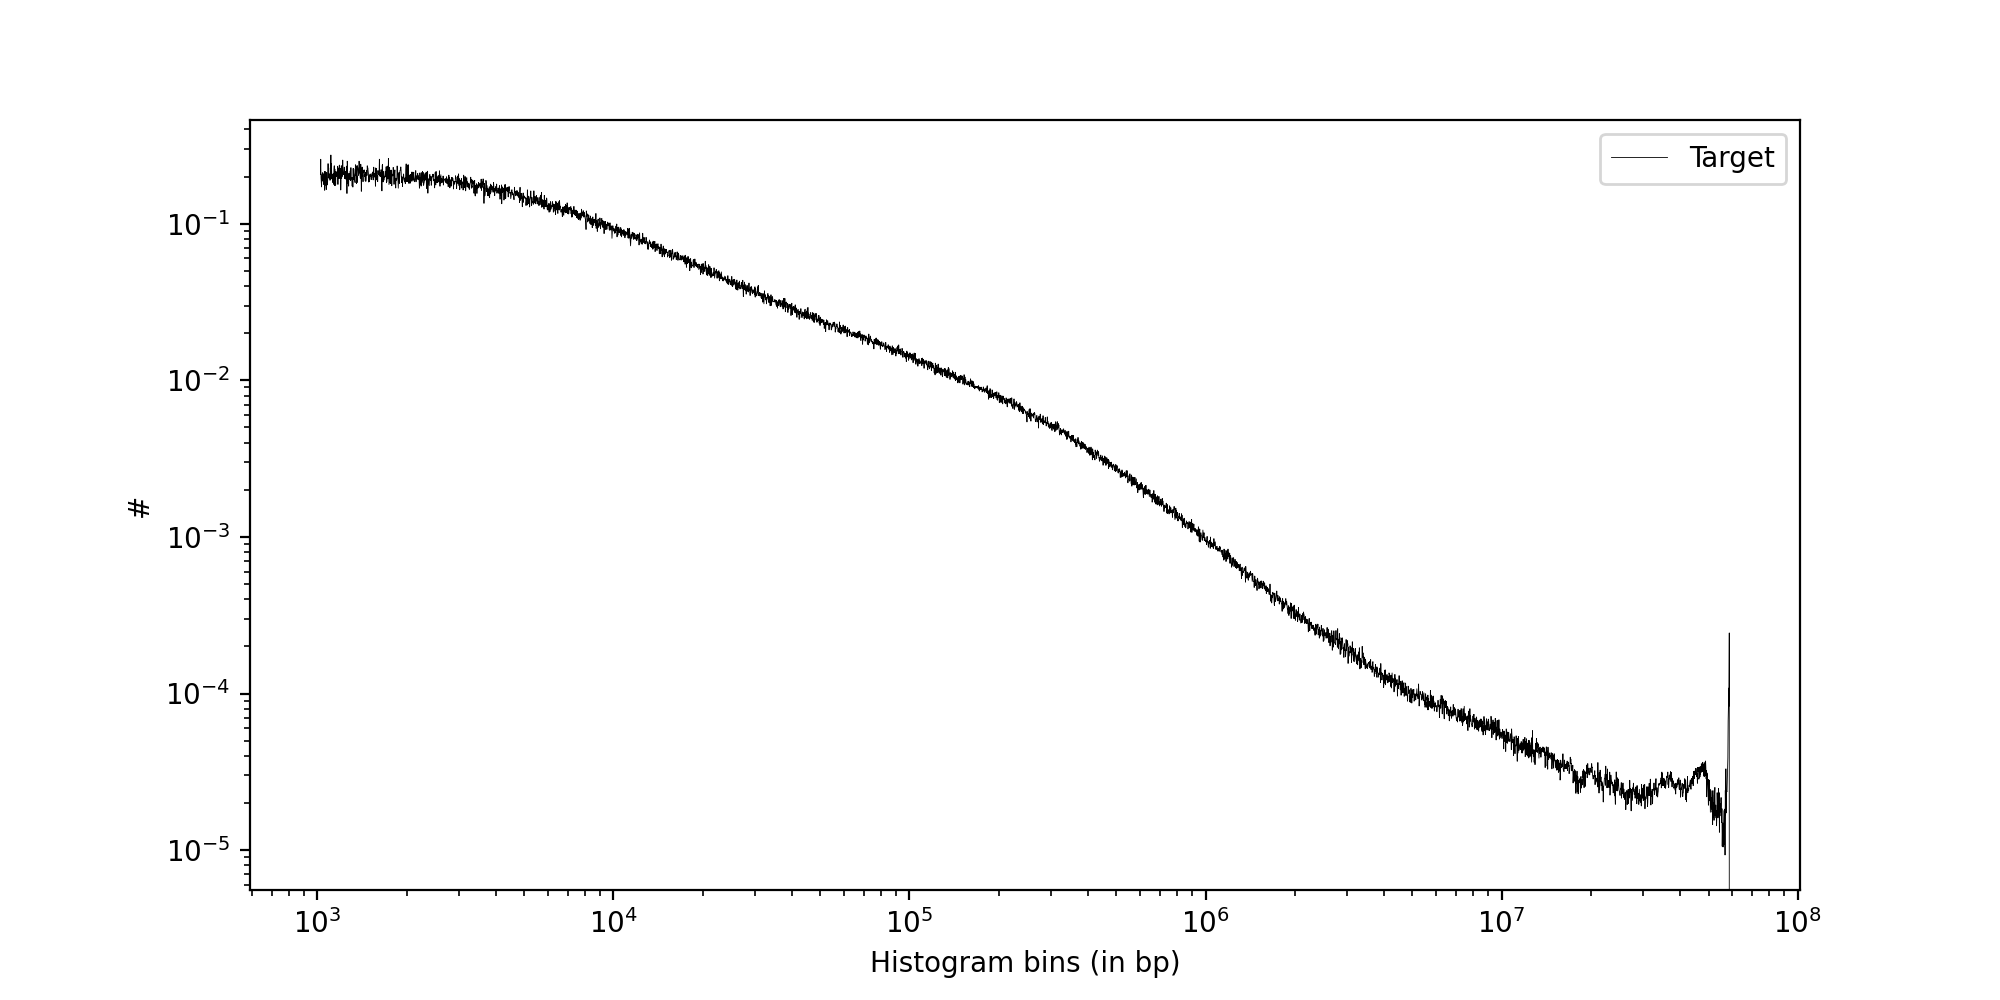

Text(0, 0.5, '#')

In [510]:
plt.figure(figsize=(10,5))
plt.plot(dcounts.value[1:], target_hist.p[1:]/dcounts.p[1:], 'k', label="Target", lw=0.3)

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("Histogram bins (in bp)")
plt.ylabel("#")


In [529]:
pts = pd.read_csv(
    "/Users/regevschweiger/git/matshuff/combined/datasets/ela_chr19/run_20210307_sgd_init=greedy_seed=1_smoothed_jac/output.1000000000", 
    sep="\s+", header=None)



In [530]:
hp = np.histogram(np.diff(pts, axis=1), bins=target_hist.value)[0]

<IPython.core.display.Javascript object>


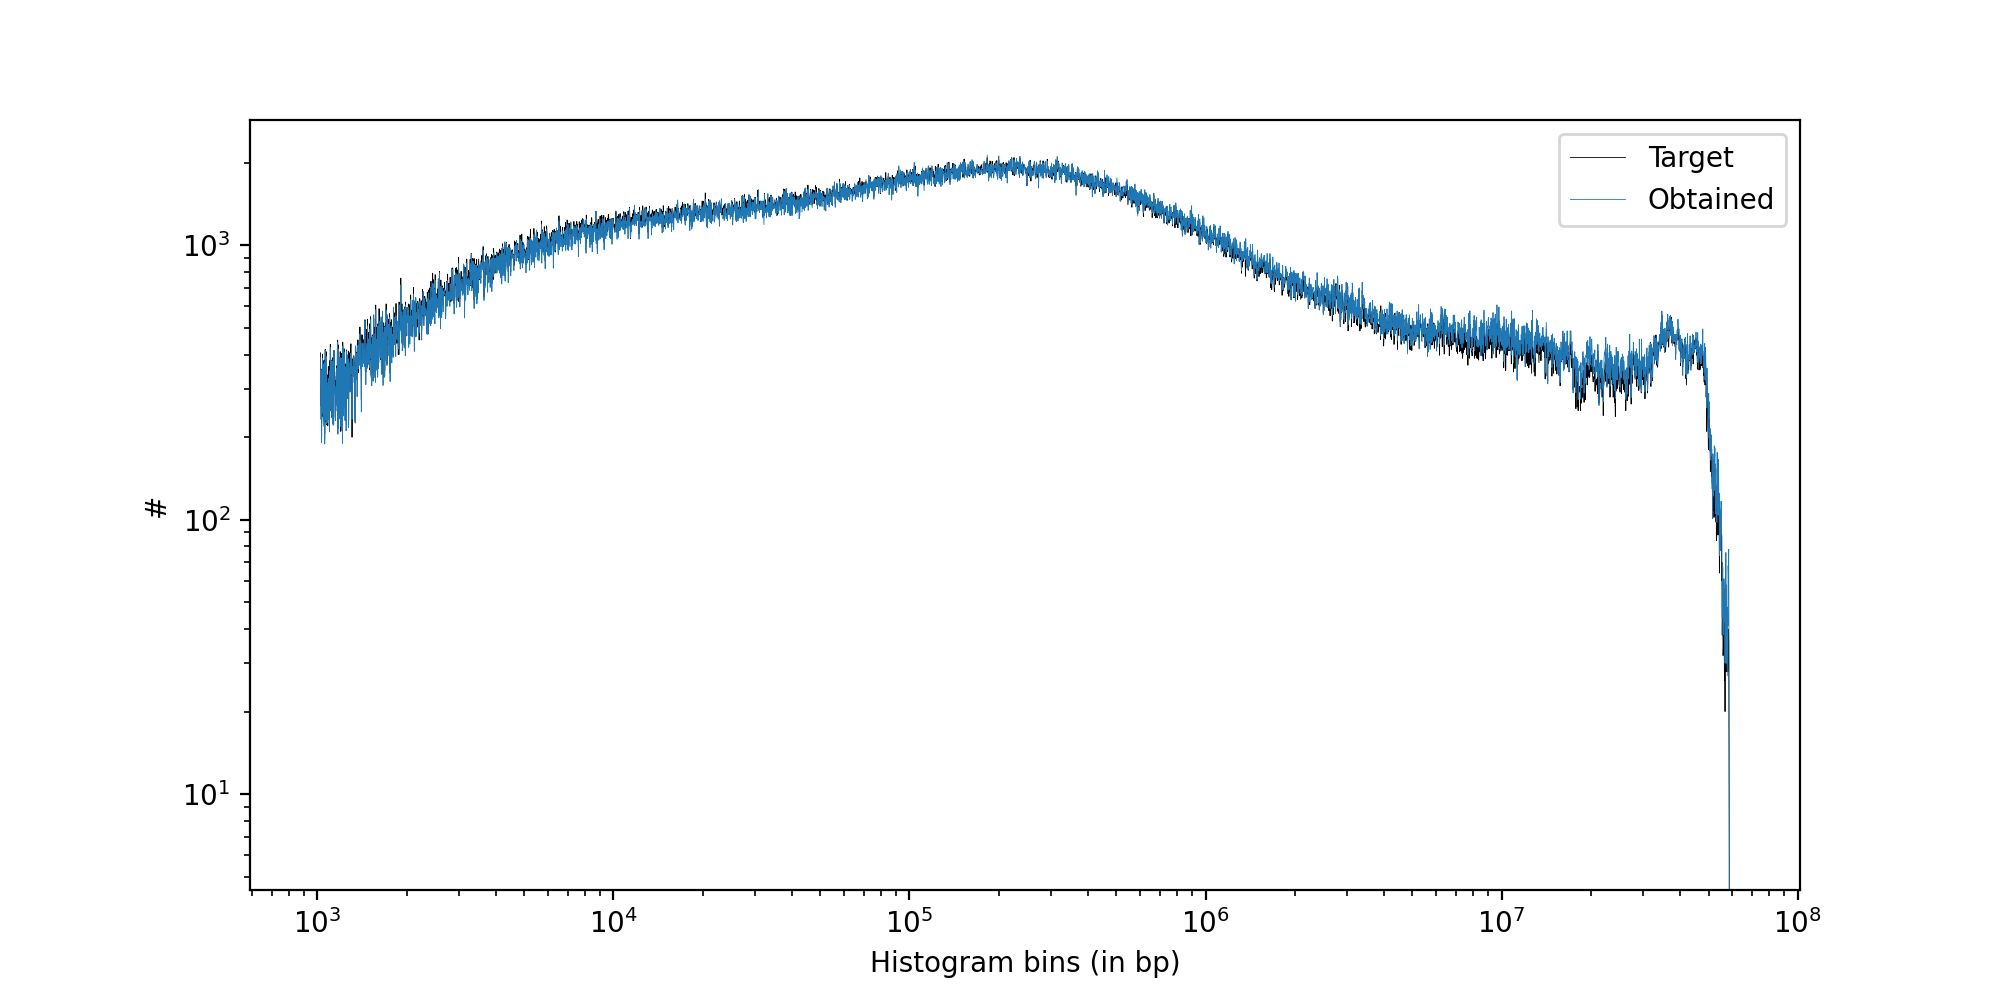

Text(0, 0.5, '#')

In [531]:
plt.figure(figsize=(10,5))
plt.plot(target_hist.value[1:-1], target_hist.p[1:-1], 'k', label="Target", lw=0.3)
plt.plot(target_hist.value[1:-1], hp[1:], label="Obtained", lw=0.3)

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("Histogram bins (in bp)")
plt.ylabel("#")


<IPython.core.display.Javascript object>


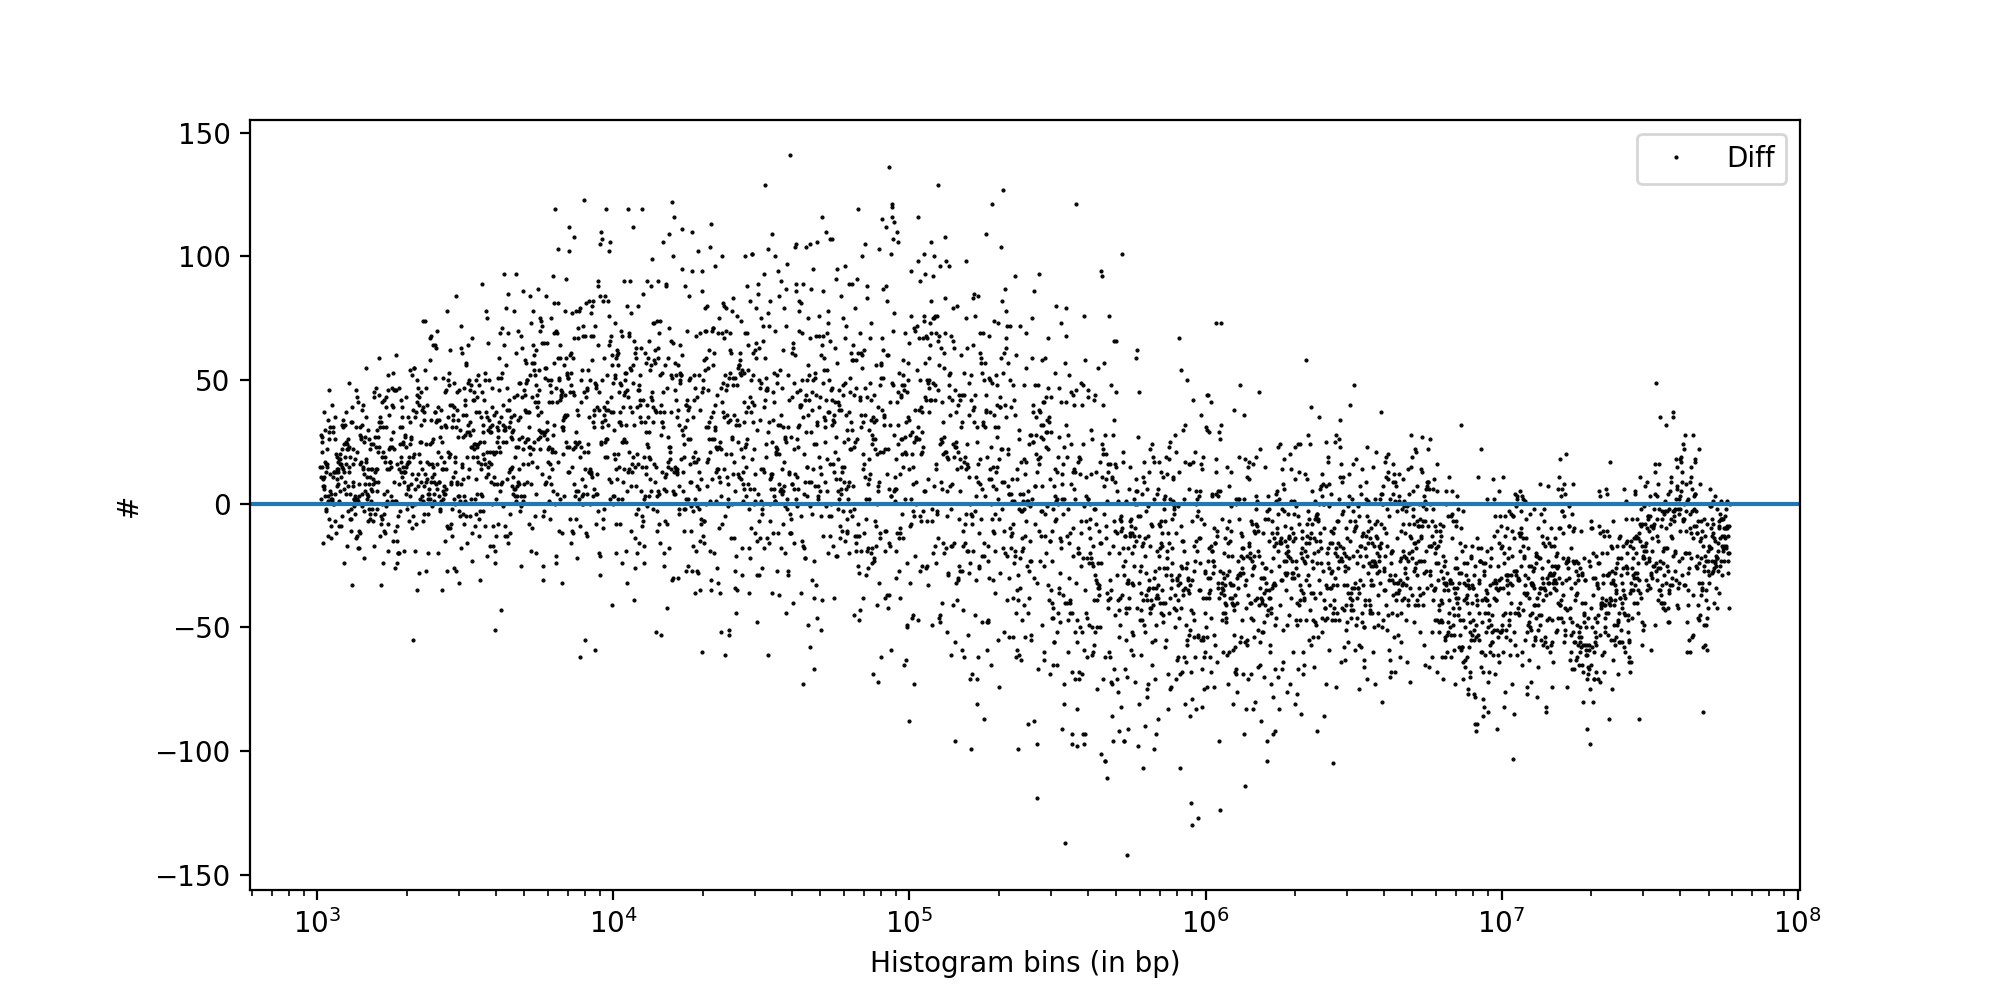

Text(0, 0.5, '#')

In [532]:
plt.figure(figsize=(10,5))
plt.plot(target_hist.value[1:-1], target_hist.p[1:-1] - hp[1:], 'k.', label="Diff", ms=1)
plt.axhline(0)
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.xlabel("Histogram bins (in bp)")
plt.ylabel("#")


In [487]:
y = target_hist.p[1:-1] - hp[1:]
x = np.arange(len(y))[:,np.newaxis]

mod = sm.OLS(y, sm.add_constant(x))

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      p   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     1516.
Date:                Wed, 24 Feb 2021   Prob (F-statistic):          7.38e-290
Time:                        11:09:17   Log-Likelihood:                -24732.
No. Observations:                4999   AIC:                         4.947e+04
Df Residuals:                    4997   BIC:                         4.948e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.4957      0.964     33.717      0.0

In [383]:
JJ = (np.diag(hp) - np.multiply.outer(hp, hp) / hp.sum())

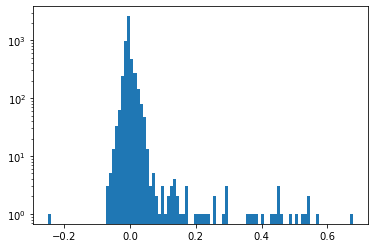

In [395]:
plt.figure()
_=plt.hist((np.linalg.pinv(JJ)@(hp- target_hist.p[:-1])).ravel(), bins=100, log=True)

In [393]:
((hp- target_hist.p[:-1])).sum()

0

In [392]:
(JJ@(hp- target_hist.p[:-1])).sum()

-4.656612873077393e-10

In [234]:
stats = open("/Users/regevschweiger/git/matshuff/combined/datasets/ela_chr19/run_20210221_sgd_seed=1_from_iter_gamma=0.5_every=10000_reg=star/output.10000000000.stats", "r")


maxad = []
meanad = []
ll = []
for stat in stats.readlines():
    maxad.append(int(re.findall("max\(abs\(diff\)\):\s+([\d]+)", stat)[0]))
    meanad.append(float(re.findall("mean\(abs\(diff\)\):\s+([\d\.]+)", stat)[0]))
    ll.append(float(re.findall("LL:\s+([-\d\.]+)", stat)[0]))
    



(0.0, 100.0)

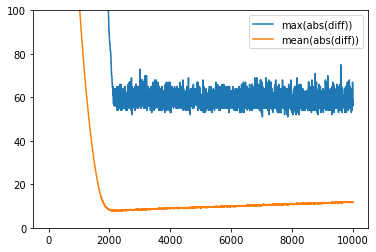

In [236]:
plt.figure()
plt.plot(maxad, label="max(abs(diff))")
plt.plot(meanad, label="mean(abs(diff))")
plt.legend()
plt.ylim(0,100)

In [15]:
plt.figure()
plt.plot(ll, label="LL%")
plt.legend()

NameError: name 'll' is not defined

<Figure size 432x288 with 0 Axes>

In [489]:
thetas = pd.read_csv("/Users/regevschweiger/git/matshuff/combined/datasets/ela_chr19/run_20210224_sgd_seed=1_every=10000_adam_multiplier=100/output.10000000000.thetas", sep="\s+", header=None).values

<IPython.core.display.Javascript object>


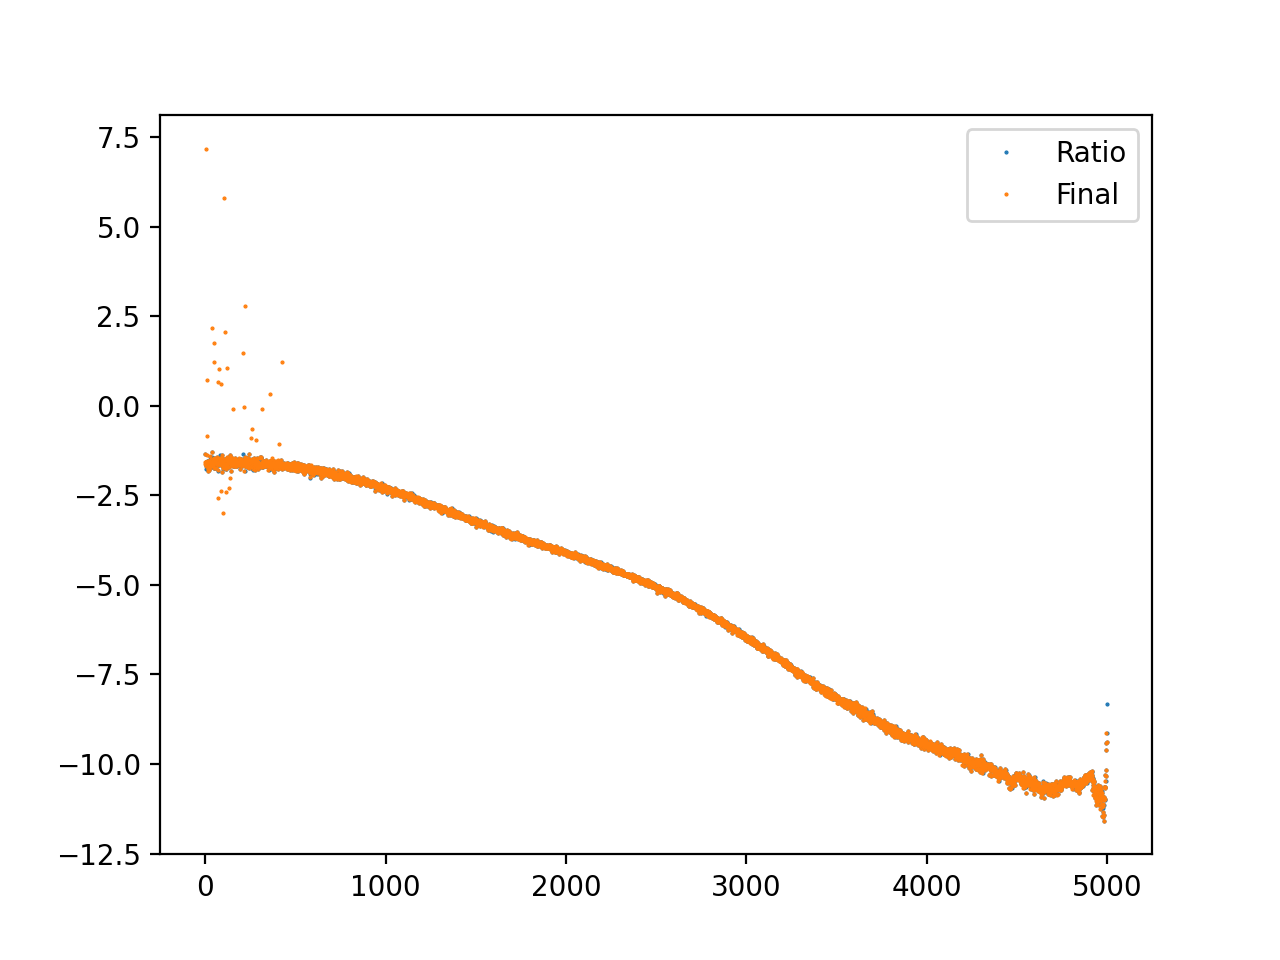

In [495]:
plt.figure()
plt.plot(thetas_ratio[1:-2], '.', ms=1, label="Ratio")
plt.plot(thetas[-1][1:-2], '.', ms=1, label="Final")
plt.legend()

<IPython.core.display.Javascript object>


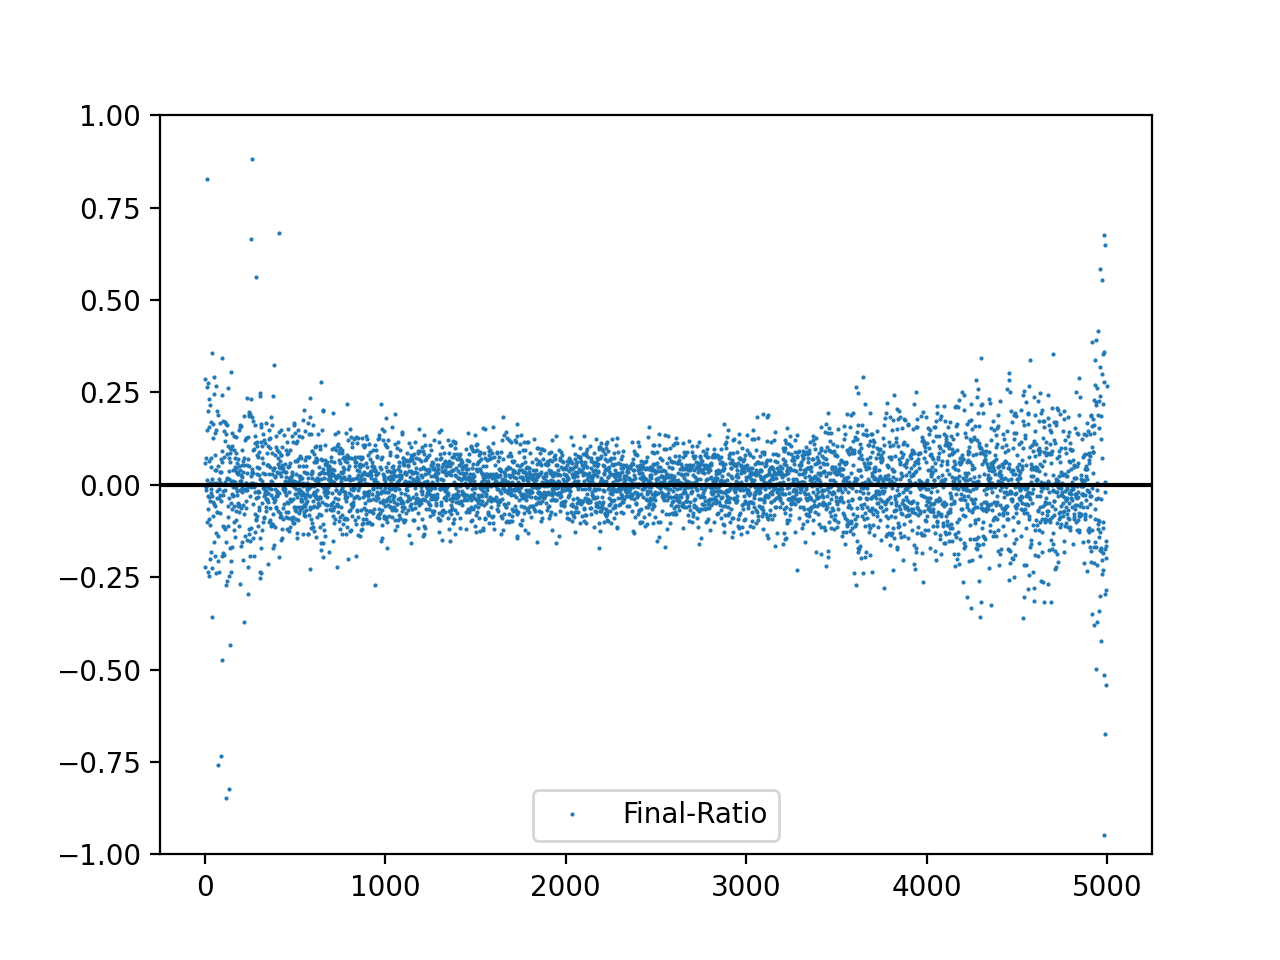

(-1.0, 1.0)

In [505]:
plt.figure()
plt.plot(thetas[-1][1:]-thetas_ratio[1:], '.', ms=1, label="Final-Ratio")
plt.axhline(0, color='k')
plt.legend()
plt.ylim(-1, 1)

In [492]:
def theta_to_denom(thetas, target_hist):
    et = 1/np.exp(thetas)
    et *= target_hist.p[:-1]
    et /= np.diff(target_hist.value)
    return et

<IPython.core.display.Javascript object>


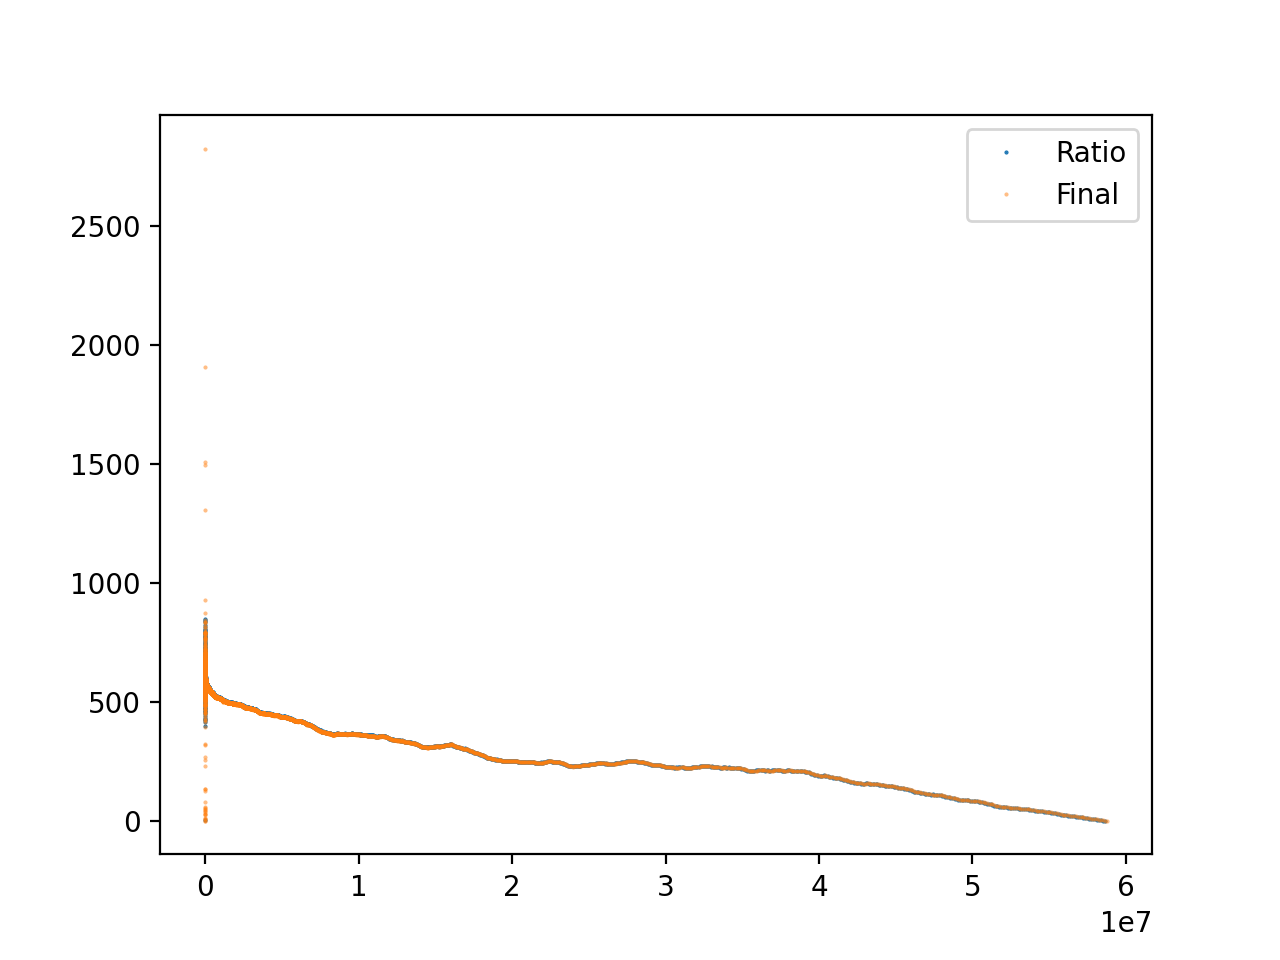

<ipython-input-492-3ec51f5bc0b5>:2: RuntimeWarning: divide by zero encountered in true_divide
  et = 1/np.exp(thetas)
/Users/regevschweiger/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in multiply
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [494]:
plt.figure()
plt.plot(target_hist.value[:-1], theta_to_denom(thetas_ratio, target_hist), '.', ms=1, label="Ratio")
plt.plot(target_hist.value[:-1], theta_to_denom(thetas[-1], target_hist), '.', ms=1, label="Final", alpha=0.5)

plt.legend()




In [43]:
hists = pd.read_csv("/Users/regevschweiger/git/matshuff/combined/datasets/ela_chr19/run_20210218_sgd_seed=0_from_iter_gamma=0.5_every=10000/output.10000000000.hists", sep="\s+", header=None).values

Text(0, 0.5, '#')

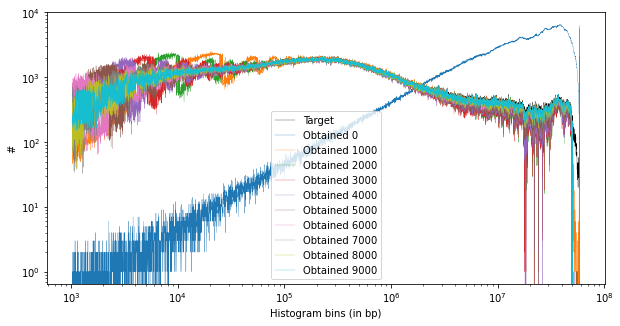

In [44]:
plt.figure(figsize=(10,5))
plt.plot(target_hist.value[1:-1], target_hist.p[1:-1], 'k', label="Target", lw=0.3)
for d in range(0,len(hists),1000):
    plt.plot(target_hist.value[1:-1], hists[d][1:], label="Obtained %d" % d, lw=0.3)

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("Histogram bins (in bp)")
plt.ylabel("#")


No handles with labels found to put in legend.


Text(0, 0.5, '#')

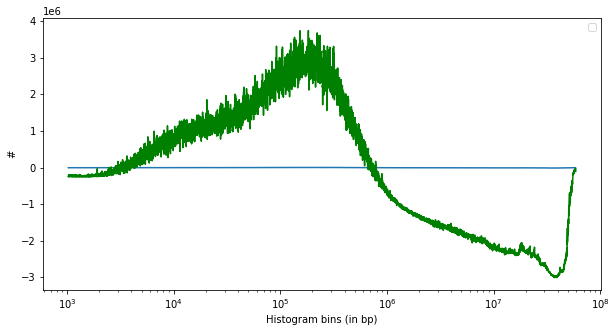

In [45]:
plt.figure(figsize=(10,5))
plt.plot(target_hist.value[1:-1], thetas[0][1:], ms=1)
plt.plot(target_hist.value[1:-1], thetas[5][1:], ms=1, color='g')
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.xlabel("Histogram bins (in bp)")
plt.ylabel("#")


Text(0, 0.5, '#')

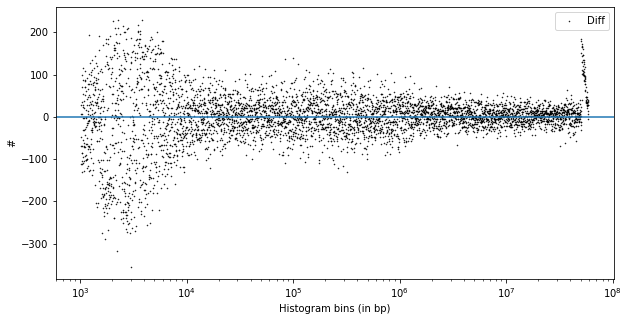

In [46]:
plt.figure(figsize=(10,5))
plt.plot(target_hist.value[1:-1], target_hist.p[1:-1] - hists[-1][1:], 'k.', label="Diff", ms=1)
plt.axhline(0)
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.xlabel("Histogram bins (in bp)")
plt.ylabel("#")


<IPython.core.display.Javascript object>


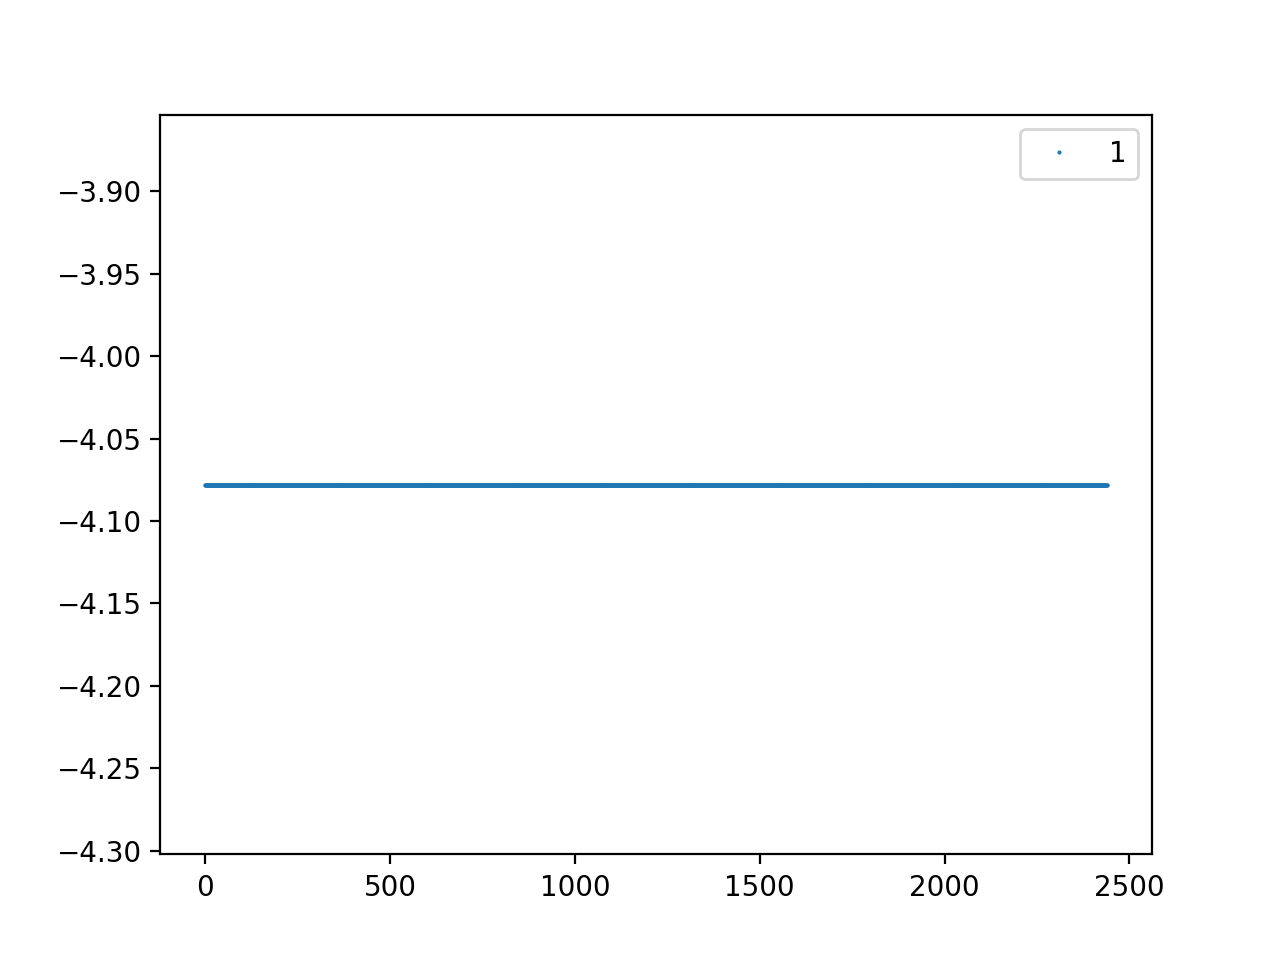

In [465]:
plt.figure()
plt.plot(thetas[1:,2000], '.', ms=1, label=1)
# plt.plot(thetas[:,100], '.', ms=1, label=100)
# plt.plot(thetas[:,200], '.', ms=1, label=200)
plt.legend()

In [360]:
dcounts = pd.read_csv("/Users/regevschweiger/git/matshuff/greedy/datasets/ela_chr19/ela_19.hist.2000.txt.dcounts", sep="\t")

<IPython.core.display.Javascript object>


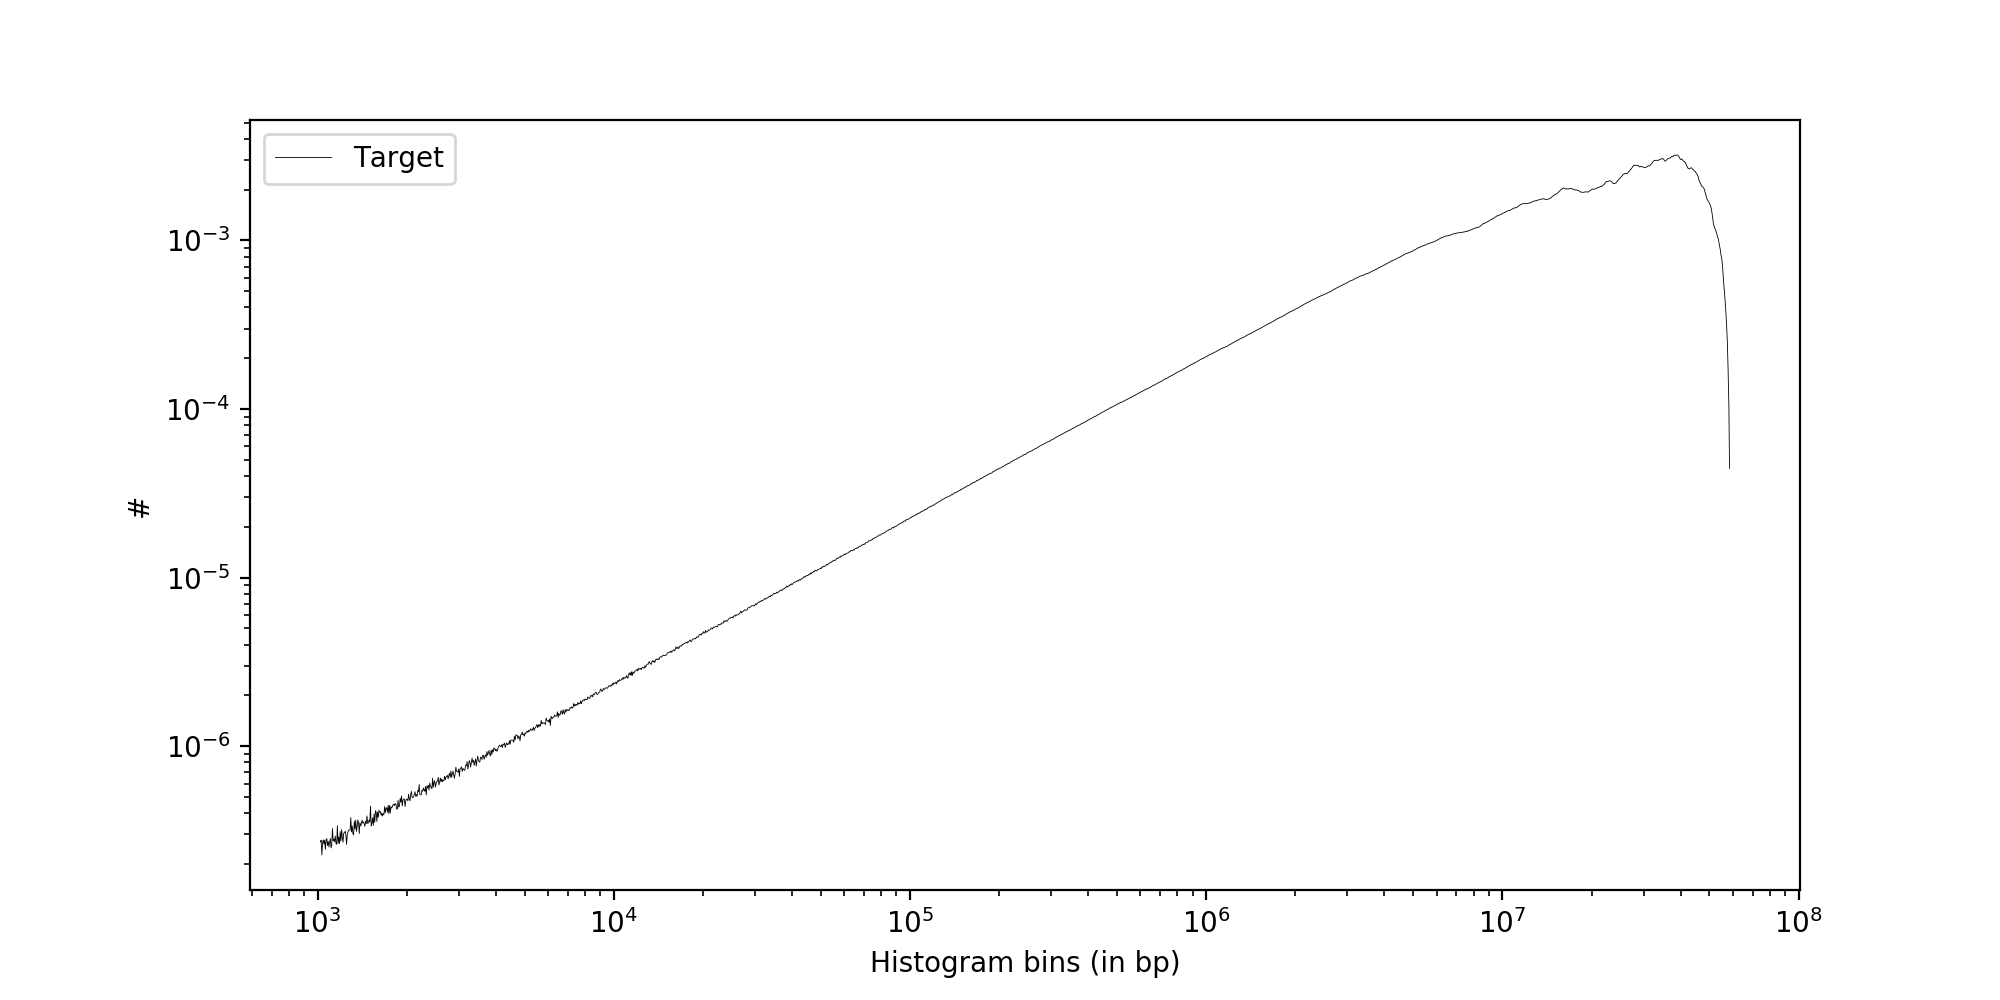

Text(0, 0.5, '#')

In [367]:
plt.figure(figsize=(10,5))
plt.plot(target_hist.value[1:-1], dcounts.p[1:-1]/ dcounts.p[1:-1].sum(), 'k', label="Target", lw=0.3)
#plt.plot(target_hist.value[1:-1], hp[1:], label="Obtained", lw=0.3)

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("Histogram bins (in bp)")
plt.ylabel("#")


<IPython.core.display.Javascript object>


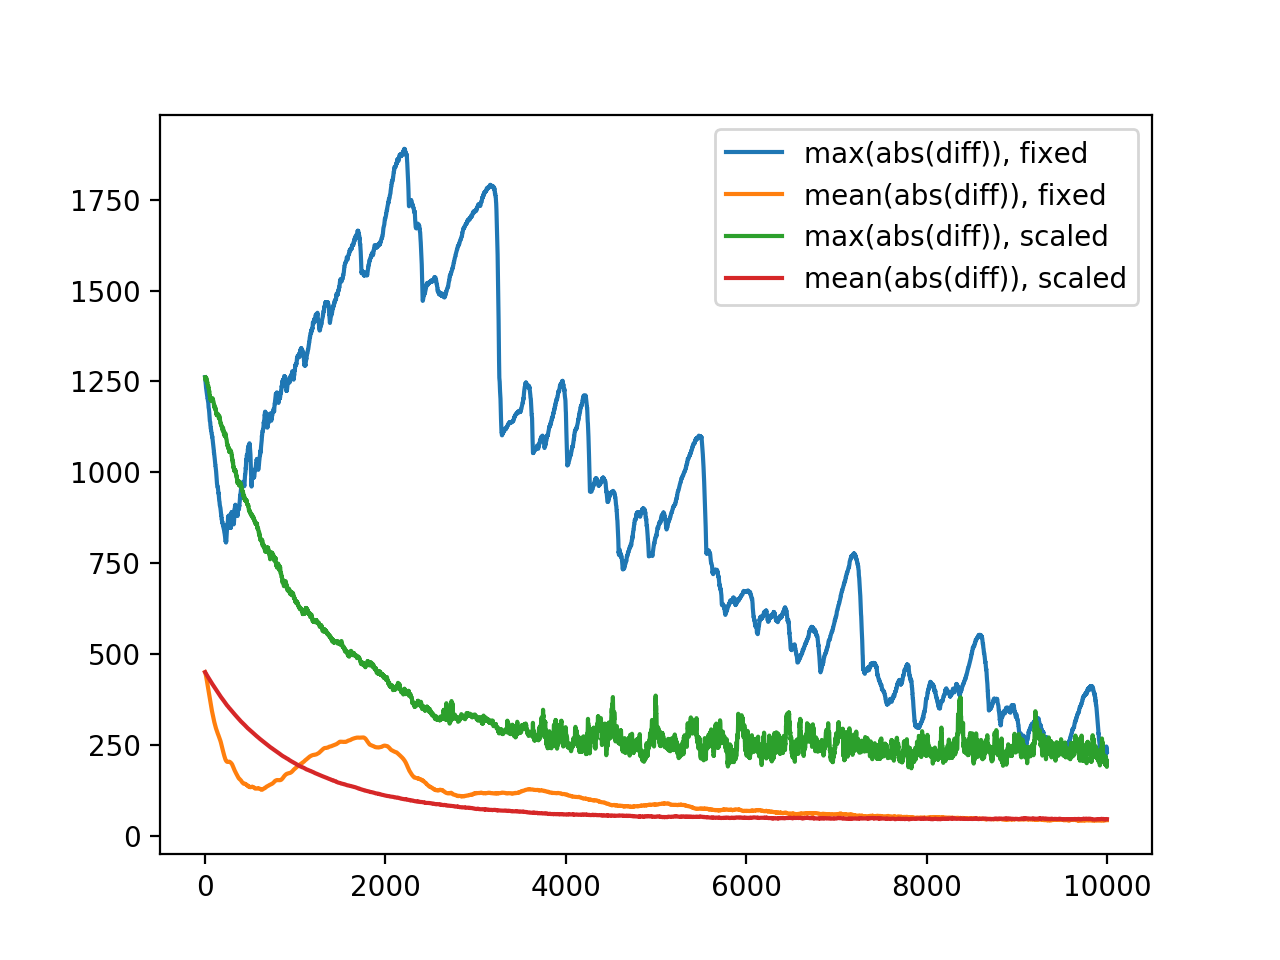

In [384]:
plt.figure()

stats = open("/Users/regevschweiger/git/matshuff/combined/datasets/ela_chr19/run_20200802_srf_seed=1_from_iter_gamma=0.5_every=10000_diaginv//output.10000000000.stats", "r")


maxad = []
meanad = []
ll = []
for stat in stats.readlines():
    maxad.append(int(re.findall("max\(abs\(diff\)\):\s+([\d]+)", stat)[0]))
    meanad.append(float(re.findall("mean\(abs\(diff\)\):\s+([\d\.]+)", stat)[0]))
    ll.append(float(re.findall("LL:\s+([\d\.]+)", stat)[0]))
    
plt.plot(maxad, label="max(abs(diff)), fixed")
plt.plot(meanad, label="mean(abs(diff)), fixed")


stats = open("/Users/regevschweiger/git/matshuff/combined/datasets/ela_chr19/run_20200803_srf_seed=2_from_iter_gamma=0.5_every=10000_diaginv_weighted/output.10000000000.stats", "r")


maxad = []
meanad = []
ll = []
for stat in stats.readlines():
    maxad.append(int(re.findall("max\(abs\(diff\)\):\s+([\d]+)", stat)[0]))
    meanad.append(float(re.findall("mean\(abs\(diff\)\):\s+([\d\.]+)", stat)[0]))
    ll.append(float(re.findall("LL:\s+([\d\.]+)", stat)[0]))
    
plt.plot(maxad, label="max(abs(diff)), scaled")
plt.plot(meanad, label="mean(abs(diff)), scaled")

plt.legend()


In [385]:
thetas_fixed = pd.read_csv("/Users/regevschweiger/git/matshuff/combined/datasets/ela_chr19/run_20200802_srf_seed=1_from_iter_gamma=0.5_every=10000_diaginv/output.10000000000.thetas", sep="\s+", header=None).values
thetas_scaled = pd.read_csv("/Users/regevschweiger/git/matshuff/combined/datasets/ela_chr19/run_20200803_srf_seed=2_from_iter_gamma=0.5_every=10000_diaginv_weighted/output.10000000000.thetas", sep="\s+", header=None).values

<IPython.core.display.Javascript object>


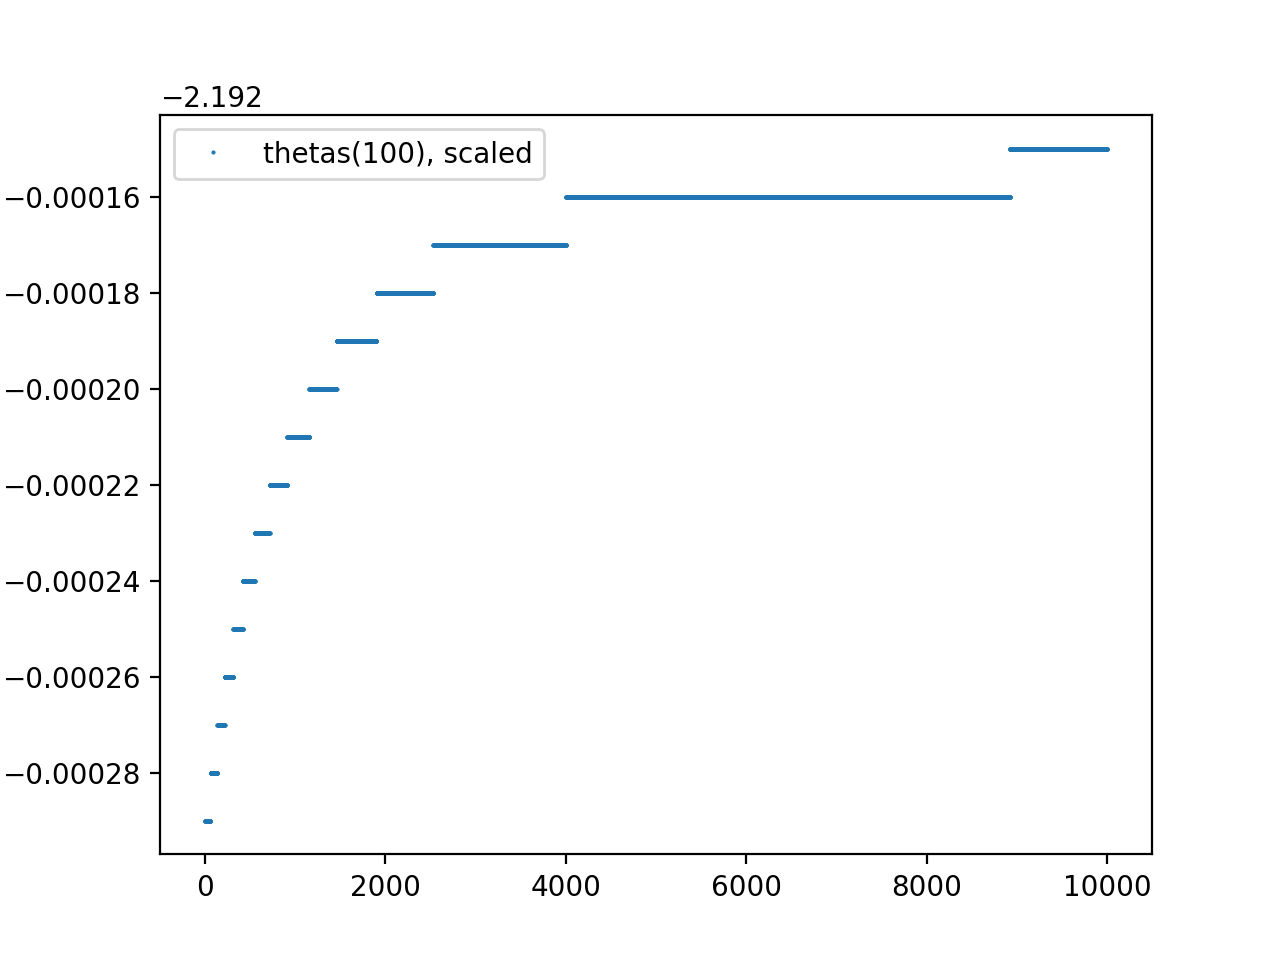

In [386]:
plt.figure()
#plt.plot(thetas_fixed[:,1], '.', ms=1, label="thetas(1), fixed")
#plt.plot(thetas_scaled[:,1], '.', ms=1, label="thetas(1), scaled")
plt.plot(thetas_scaled[:,100], '.', ms=1, label="thetas(100), scaled")
#plt.plot(thetas_scaled[:,200], '.', ms=1, label="thetas(200), scaled")

plt.legend()